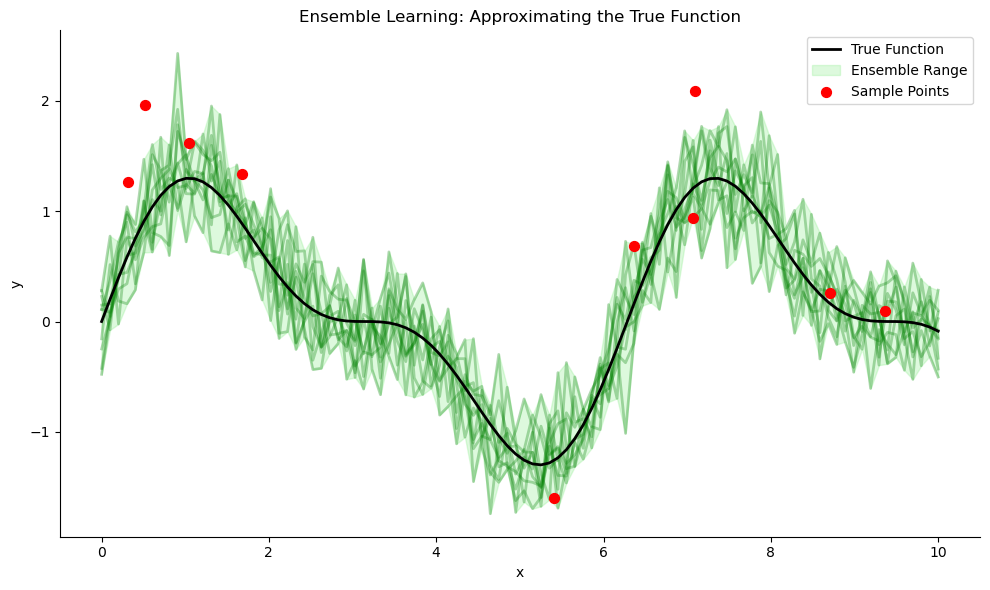

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.linspace(0, 10, 100)

# Define the true function (black line)
def true_function(x):
    return np.sin(x) + 0.5 * np.sin(2 * x)

# Generate y values for the true function
y_true = true_function(x)

# Generate ensemble models with noise
n_models = 10
ensemble_models = []
for _ in range(n_models):
    noise = np.random.normal(0, 0.3, size=x.shape)
    ensemble_models.append(y_true + noise)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot ensemble models
for model in ensemble_models:
    plt.plot(x, model, color='green', alpha=0.3, linewidth=2)

# Plot the true function
plt.plot(x, y_true, color='black', linewidth=2, label='True Function')

# Calculate and plot the shaded region
min_y = np.min(ensemble_models, axis=0)
max_y = np.max(ensemble_models, axis=0)
plt.fill_between(x, min_y, max_y, color='lightgreen', alpha=0.3, label='Ensemble Range')

# Generate and plot random points
n_points = 10
random_x = np.random.uniform(0, 10, n_points)
random_y = true_function(random_x) + np.random.normal(0, 0.5, n_points)
plt.scatter(random_x, random_y, color='red', s=50, zorder=5, label='Sample Points')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ensemble Learning: Approximating the True Function')
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

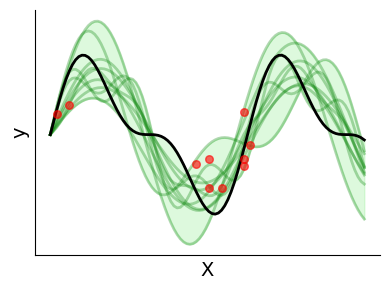

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.linspace(0, 10, 100)

# Define the true function (black line)
def true_function(x):
    return np.sin(x) + 0.5 * np.sin(2 * x)

def noisy_function(x):
    return np.sin(x) + 0.5*np.random.normal(0,1,1) *np.sin(2*np.random.normal(0,1,1)*x)

# Generate y values for the true function
y_true = true_function(x)

# Generate ensemble models with noise
n_models = 10
ensemble_models = []
for _ in range(n_models):
    # noise = np.random.normal(0, 0.3, size=x.shape)
    # ensemble_models.append(y_true + noise)
    ensemble_models.append(noisy_function(x))

# Create the plot
plt.figure(figsize=(4,3))

# Plot ensemble models
for model in ensemble_models:
    plt.plot(x, model, color='green', alpha=0.3, linewidth=2)

# Plot the true function
plt.plot(x, y_true, color='black', linewidth=2, label='True Function')

# Calculate and plot the shaded region
ensemble_models.append(np.array(y_true))
min_y = np.min(ensemble_models, axis=0)
max_y = np.max(ensemble_models, axis=0)
plt.fill_between(x, min_y, max_y, color='lightgreen', alpha=0.3, label='Ensemble Range')

# Generate and plot random points
n_points = 10
# random_x = np.random.uniform(0, 10, n_points)
random_x = np.random.choice(x, n_points)
random_y = []
for point in random_x:
    random_y.append(np.random.uniform(min_y[np.where(x==point)], max_y[np.where(x==point)]))
# random_y = true_function(random_x) + np.random.normal(0, 0.5, n_points)
plt.scatter(random_x, random_y, color='red', s=30, zorder=5, label='Sample Points', alpha=0.6)

# Customize the plot
plt.xlabel('X', size=14)
plt.ylabel('y', size=14)
# plt.title('Ensemble Learning: Approximating the True Function')
# plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove ticks
plt.tick_params(axis='both', which='both', length=0,
                labelbottom=False, labelleft=False)

# Show the plot
plt.tight_layout()
# plt.show()
plt.savefig('ensemble_function.pdf')